## Exercise 5 - Pandas

Marit Svendby Otervik

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime

### 1. Creating a Pandas DataFrame

In [2]:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/
df = pd.read_csv("data/data_000637.txt")
df.head()

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25


In [3]:
#In this DataFrame, N is equal to number of rows, which is:
print("N =",df.shape[0])
#1310720

N = 1310720


### 2. Estimate the number of BX in a ORBIT

In [4]:
bx = df["BX_COUNTER"]
bx_max = max(bx)
print(bx_max)

3563


### 3. Calculating absolute time in ns

In [5]:
orbit = df["ORBIT_CNT"]
tdc = df["TDC_CHANNEL"]

#Beginning of Data Aquisation:
t_start = tdc[0]*25/30 + bx[0]*25 + orbit[0]*25*bx_max

#Columns of nanoseconds since data acquisition:
df["ABS_TIME"] = (tdc*25/30 + bx*25 + orbit*25*bx_max) - t_start

df

#Comment: I didn't undertsand from the task if the new column should 
#be in nanoseconds or converted into a hh:mm:ss format, so I just chose nanoseconds
#The New column is displayed in the output

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME
0,1,0,123,3869200167,2374,26,0.000000e+00
1,1,0,124,3869200167,2374,27,8.125000e-01
2,1,0,63,3869200167,2553,28,4.425000e+03
3,1,0,64,3869200167,2558,19,4.550812e+03
4,1,0,64,3869200167,2760,25,9.600812e+03
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,9.801409e+08
1310716,1,1,4,3869211171,763,11,9.801409e+08
1310717,1,0,64,3869211171,764,0,9.801410e+08
1310718,1,0,139,3869211171,769,0,9.801412e+08


### 4. Finding duration

In [6]:
#Since the first value is defined as the beginning of data acquisition (t=0),
#The last value of ABS_TIME will be the duration in nanoseconds

last_ns = df["ABS_TIME"].iloc[-1]
duration = pd.Timedelta(f"{last_ns}ns")
print("Duration of data taking:",duration)

Duration of data taking: 0 days 00:00:00.980140


### 5. Find the noisy channels

In [7]:
df["TDC_CHANNEL"].value_counts()

139    108059
64      66020
63      64642
61      49479
62      49349
        ...  
126       606
130        71
138        70
137        68
129        37
Name: TDC_CHANNEL, Length: 133, dtype: int64

In [8]:
channel_count = df.groupby("TDC_CHANNEL")["HEAD"].sum()
channel_count_sorted = channel_count.sort_values(ascending=False)
print(channel_count_sorted)

TDC_CHANNEL
139    108059
64      66020
63      64642
61      49479
62      49349
        ...  
126       606
130        71
138        70
137        68
129        37
Name: HEAD, Length: 133, dtype: int64


### 6. Counting non-empty orbits

In [9]:
unique_orbits = orbit.unique()
print("Number of non-empty orbits:",len(unique_orbits))

Number of non-empty orbits: 11001


### 7. Counting non-empty orbits in channel 139

In [10]:
#creating a new data frame only with TDC_CHANNEL=139
df_139 = df.loc[df["TDC_CHANNEL"]==139]

unique_orbits_139 = df_139["ORBIT_CNT"].unique()
print("Number of non-empty orbits from TDC_CHANNEL=139 :",len(unique_orbits_139))

Number of non-empty orbits from TDC_CHANNEL=139 : 10976


### 8. Channel count for each FPGA

In [11]:
df_0 = df.loc[df["FPGA"]==0] #Data Frame for FPGA=0
df_1 = df.loc[df["FPGA"]==1] #Data Frame for FPGA=1

In [12]:
channel_count_0 = df_0["TDC_CHANNEL"].value_counts()
print("Counts for TDC-channels with FPGA = 0:")
print(channel_count_0)

Counts for TDC-channels with FPGA = 0:
139    75617
64     64581
63     63724
61     48699
62     48275
       ...  
130       33
137       32
30         4
129        2
39         1
Name: TDC_CHANNEL, Length: 124, dtype: int64


In [13]:
channel_count_1 = df_1["TDC_CHANNEL"].value_counts()
print("Counts for TDC-channels with FPGA = 1:")
print(channel_count_1)

Counts for TDC-channels with FPGA = 1:
2      32669
139    32442
1      28438
4      26403
3      21970
       ...  
9         80
130       38
138       36
137       36
129       35
Name: TDC_CHANNEL, Length: 132, dtype: int64


### 9. Histogram of TDC_CHANNEL count

In [14]:
#Sorting the series by index for plotting
sorted0 = channel_count_1.sort_index()
sorted1 = channel_count_1.sort_index()

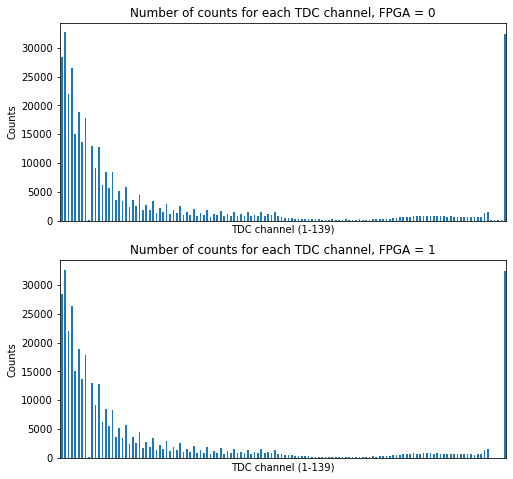

In [15]:
fig, axes = plt.subplots(figsize=(8,8),nrows=2, ncols=1)

ax0 = sorted0.plot.bar(ax=axes[0])
ax0.xaxis.set_major_locator(ticker.NullLocator())
ax0.set_title("Number of counts for each TDC channel, FPGA = 0")
ax0.set_xlabel("TDC channel (1-139)")
ax0.set_ylabel("Counts")

ax1 = sorted1.plot.bar(ax=axes[1])
ax1.xaxis.set_major_locator(ticker.NullLocator())
ax1.set_title("Number of counts for each TDC channel, FPGA = 1")
ax1.set_xlabel("TDC channel (1-139)")
ax1.set_ylabel("Counts")

plt.show()